<a href="https://colab.research.google.com/github/Sudharshinijothikumar/Bank_Creditwise_Classifier/blob/main/CREDITWISE_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CreditWise Classifier


The developed model effectively categorizes customers into three groups based on their creditworthiness, using a combination of features such as credit history, employment status, and personal demographics. By leveraging machine learning algorithms and thorough feature engineering, the model provides actionable insights for data-driven decision-making in credit lending and risk management at C&T Bank.

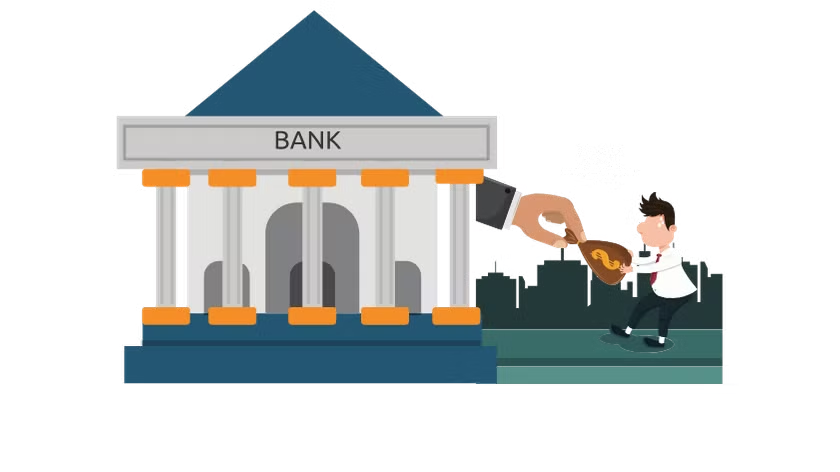

# IMPORT DATABASE

In [4]:
#import the necessary modules,packages and framework

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
import tensorflow as tf
from tensorflow import keras

# LOAD DATASET

In [5]:
customers_train = pd.read_csv("/content/C&T train dataset.csv")
customers_test = pd.read_csv("/content/C&T test dataset.csv")

# ANALYSE DATASET

In [6]:
customers_train.shape

#see the no  of  rows and colums

(800, 21)

In [7]:
customers_test.shape

(200, 20)

In [8]:
customers_train.info()
#describe each field

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               800 non-null    int64  
 1   acc_info          800 non-null    object 
 2   duration_month    800 non-null    int64  
 3   credit_history    800 non-null    object 
 4   purpose           800 non-null    object 
 5   savings_acc       800 non-null    object 
 6   employment_st     792 non-null    object 
 7   poi               788 non-null    float64
 8   personal_status   800 non-null    object 
 9   gurantors         792 non-null    object 
 10  resident_since    800 non-null    int64  
 11  property_type     800 non-null    object 
 12  age               796 non-null    float64
 13  installment_type  800 non-null    object 
 14  housing_type      793 non-null    object 
 15  credits_no        800 non-null    int64  
 16  job_type          800 non-null    object 
 1

In [9]:
customers_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               200 non-null    int64  
 1   acc_info          200 non-null    object 
 2   duration_month    200 non-null    int64  
 3   credit_history    200 non-null    object 
 4   purpose           200 non-null    object 
 5   savings_acc       200 non-null    object 
 6   employment_st     195 non-null    object 
 7   poi               195 non-null    float64
 8   personal_status   200 non-null    object 
 9   gurantors         200 non-null    object 
 10  resident_since    200 non-null    int64  
 11  property_type     200 non-null    object 
 12  age               198 non-null    float64
 13  installment_type  200 non-null    object 
 14  housing_type      192 non-null    object 
 15  credits_no        200 non-null    int64  
 16  job_type          200 non-null    object 
 1

In [10]:
customers_train.describe()
#look at mean,min,max etc..

,sno,duration_month,poi,resident_since,age,credits_no,liables,Group_no
count,800.0000,800.00000,788.000000,800.000000,796.000000,800.000000,800.000000,800.000000
mean,400.5000,20.65125,2.950508,2.841250,35.408291,1.396250,1.147500,2.076250
std,231.0844,12.15635,1.130084,1.106833,11.499101,0.569773,0.354825,0.744062
min,1.0000,4.00000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,200.7500,12.00000,2.000000,2.000000,27.000000,1.000000,1.000000,2.000000
50%,400.5000,18.00000,3.000000,3.000000,33.000000,1.000000,1.000000,2.000000
75%,600.2500,24.00000,4.000000,4.000000,41.000000,2.000000,1.000000,3.000000
max,800.0000,72.00000,4.000000,4.000000,75.000000,4.000000,2.000000,3.000000


In [11]:
customers_test.describe()

,sno,duration_month,poi,resident_since,age,credits_no,liables
count,200.000000,200.000000,195.000000,200.000000,198.000000,200.000000,200.000000
mean,100.500000,21.910000,2.974359,2.860000,36.106061,1.450000,1.185000
std,57.879185,11.635671,1.081408,1.093792,11.053808,0.607739,0.389272
min,1.000000,4.000000,1.000000,1.000000,20.000000,1.000000,1.000000
25%,50.750000,12.000000,2.000000,2.000000,28.000000,1.000000,1.000000
50%,100.500000,20.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,150.250000,27.250000,4.000000,4.000000,43.000000,2.000000,1.000000
max,200.000000,60.000000,4.000000,4.000000,68.000000,4.000000,2.000000


In [12]:
customers_train.head()
#to look at how each column has records

,sno,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,...,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
0,1,A11,6,A34,A43,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2,A173,1,A192,A201,3
1,2,A12,48,A32,A43,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1,A173,1,A191,A201,1
2,3,A14,12,A34,A46,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1,A172,2,A191,A201,2
3,4,A11,42,A32,A42,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1,A173,2,A191,A201,1
4,5,A11,24,A33,A40,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2,A173,2,A191,A201,1


In [13]:
customers_test.head()

,sno,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,A14,24,A34,A46,A61,A75,4.0,A93,A101,4,A124,54.0,A143,A153,2,A173,2,A191,A201
1,2,A12,18,A34,A43,A61,A75,3.0,A92,A103,4,A121,48.0,A141,A151,2,A172,1,A192,A201
2,3,A11,20,A34,A42,A61,A75,1.0,A92,A101,4,A122,24.0,A143,A152,2,A173,1,A191,A201
3,4,A14,12,A34,A43,A65,A75,4.0,A93,A101,4,A123,35.0,A143,A152,2,A173,1,A191,A201
4,5,A12,12,A32,A40,A65,A71,1.0,A92,A101,2,A121,24.0,A143,A151,1,A171,1,A191,A201


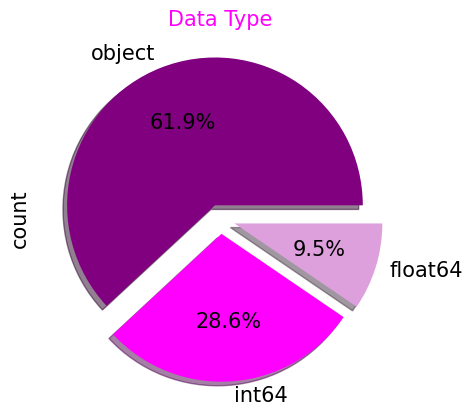

In [14]:
#see the distribution of datatypes
plt.rcParams.update({'font.size': 15})

customers_train.dtypes.value_counts().plot.pie(explode=[0.1, 0.1, 0.1],
                                       autopct='%1.1f%%',
                                       shadow=True,
                                       colors=['purple', 'fuchsia', 'plum'])
plt.title('Data Type',
          color='fuchsia',
          loc='center',
          font='Lucida Calligraphy');

# PREPROCESS AND FEATURE ENGINEERING

**1.Remove NULL Values                                                     
  2.Remove Outliers                                                       
  3.Encode Characters into numeric type                                     
  4.Ignore unwanted Features**

In [15]:
customers_train.isnull().sum()
#check for the presence of null values

sno                  0
acc_info             0
duration_month       0
credit_history       0
purpose              0
savings_acc          0
employment_st        8
poi                 12
personal_status      0
gurantors            8
resident_since       0
property_type        0
age                  4
installment_type     0
housing_type         7
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            0
Group_no             0
dtype: int64

In [16]:
customers_test.isnull().sum()

sno                 0
acc_info            0
duration_month      0
credit_history      0
purpose             0
savings_acc         0
employment_st       5
poi                 5
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 2
installment_type    0
housing_type        8
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
dtype: int64

In [17]:
customers_train['acc_info'].unique()

array(['A11', 'A12', 'A14', 'A13'], dtype=object)

In [18]:

mapping_account_info = {'A11': 1, 'A12': 2, 'A13': 3, 'A14': 4}

# Replace values using mapping dictionary
customers_train['acc_info'] = customers_train['acc_info'].replace(mapping_account_info)

In [19]:


# Replace values using mapping dictionary
customers_test['acc_info'] = customers_test['acc_info'].replace(mapping_account_info)

In [20]:
#to check for outliers in duration_month
customers_train['duration_month'].sort_values()

234     4
314     4
734     4
527     4
430     5
       ..
255    60
616    60
714    60
373    60
677    72
Name: duration_month, Length: 800, dtype: int64

In [21]:
#we do normalisation as there is a large range of values in duration_month
# Perform Min-Max scaling
customers_train['duration_month'] = (customers_train['duration_month'] - customers_train['duration_month'].min()) / (customers_train['duration_month'].max() - customers_train['duration_month'].min())


In [22]:
customers_test['duration_month'] = (customers_test['duration_month'] - customers_test['duration_month'].min()) / (customers_test['duration_month'].max() - customers_test['duration_month'].min())

In [23]:
customers_train['duration_month'].sort_values()

234    0.000000
314    0.000000
734    0.000000
527    0.000000
430    0.014706
         ...   
255    0.823529
616    0.823529
714    0.823529
373    0.823529
677    1.000000
Name: duration_month, Length: 800, dtype: float64

In [24]:
customers_train['credit_history'].unique()

array(['A34', 'A32', 'A33', 'A30', 'A31'], dtype=object)

In [25]:
# Define mapping dictionary
mapping_credit = {'A30':0, 'A31': 1, 'A32': 2, 'A33': 3, 'A34': 4}

# Replace values using mapping dictionary
customers_train['credit_history'] = customers_train['credit_history'].replace(mapping_credit)

In [26]:
customers_test['credit_history'] = customers_test['credit_history'].replace(mapping_credit)

In [27]:
customers_train['purpose'].unique()

array(['A43', 'A46', 'A42', 'A40', 'A41', 'A49', 'A44', 'A45', 'A410',
       'A48'], dtype=object)

In [28]:
# Define mapping dictionary
mapping_purpose = {'A40':0, 'A41': 1, 'A42': 2, 'A43': 3, 'A44': 4, 'A45':5, 'A46' :6,  'A48':7, 'A49':8,'A410':9}

# Replace values using mapping dictionary
customers_train['purpose'] = customers_train['purpose'].replace(mapping_purpose)

In [29]:
customers_test['purpose'] = customers_test['purpose'].replace(mapping_purpose)

In [30]:
customers_train['savings_acc'].unique()

array(['A65', 'A61', 'A63', 'A64', 'A62'], dtype=object)

In [31]:
# Define mapping dictionary
mapping_savings = {'A61': 1, 'A62': 2, 'A63': 3, 'A64': 4, 'A65':5}

# Replace values using mapping dictionary
customers_train['savings_acc'] = customers_train['savings_acc'].replace(mapping_savings)
customers_test['savings_acc'] = customers_test['savings_acc'].replace(mapping_savings)

In [32]:
customers_train['employment_st'].unique()

array(['A75', 'A73', 'A74', 'A71', 'A72', nan], dtype=object)

In [33]:
# Define mapping dictionary
mapping_emp = {'A71': 1, 'A72': 2, 'A73': 3, 'A74': 4, 'A75':5, np.NaN:0}

# Replace values using mapping dictionary
customers_train['employment_st'] = customers_train['employment_st'].replace(mapping_emp)
customers_test['employment_st'] = customers_test['employment_st'].replace(mapping_emp)

In [34]:
customers_test['employment_st']=customers_test['employment_st'].fillna('0')
customers_train['employment_st']=customers_train['employment_st'].fillna('0')

In [35]:
customers_train['poi']=customers_train['poi'].fillna('0')
customers_test['poi']=customers_test['poi'].fillna('0')
#to  remove null values

In [36]:
customers_train['personal_status'].unique()

array(['A93', 'A92', 'A91', 'A94'], dtype=object)

In [37]:
# Define mapping dictionary
mapping_pers = {'A91': 1, 'A92': 2, 'A93': 3, 'A94': 4}

# Replace values using mapping dictionary
customers_train['personal_status'] = customers_train['personal_status'].replace(mapping_pers)
customers_test['personal_status'] = customers_test['personal_status'].replace(mapping_pers)

In [38]:
customers_train['gurantors'].unique()

array(['A101', 'A103', 'A102', nan], dtype=object)

In [39]:
# Define mapping dictionary
mapping_gurators = {'A101': 1, 'A102': 2, 'A103': 3}

# Replace values using mapping dictionary
customers_train['gurantors'] = customers_train['gurantors'].replace(mapping_gurators)
customers_test['gurantors'] = customers_test['gurantors'].replace(mapping_gurators)

In [40]:
customers_train['gurantors']=customers_train['gurantors'].fillna('0')
customers_test['gurantors']=customers_test['gurantors'].fillna('0')

In [41]:
customers_train['resident_since'].sort_values()
#no need normalisation as there is no outliers

399    1
115    1
114    1
562    1
188    1
      ..
471    4
151    4
153    4
482    4
0      4
Name: resident_since, Length: 800, dtype: int64

In [42]:
customers_test['resident_since'].sort_values()

73     1
145    1
182    1
118    1
66     1
      ..
81     4
76     4
75     4
70     4
199    4
Name: resident_since, Length: 200, dtype: int64

In [43]:
customers_train['property_type'].unique()

array(['A121', 'A122', 'A124', 'A123'], dtype=object)

In [44]:
# Define mapping dictionary
mapping_prop = {'A121': 1, 'A122': 2, 'A123': 3, 'A124' :4}

# Replace values using mapping dictionary
customers_train['property_type'] = customers_train['property_type'].replace(mapping_prop)
customers_test['property_type'] = customers_test['property_type'].replace(mapping_prop)

In [45]:
# Calculate the mean of the column age
mean_value = customers_train['age'].mean()



In [46]:
# Fill NaN values with the mean
customers_train['age'] = customers_train['age'].fillna(mean_value)
customers_test['age'] = customers_test['age'].fillna(mean_value)

In [47]:
customers_train['installment_type'].unique()

array(['A143', 'A141', 'A142'], dtype=object)

In [48]:
# Define mapping dictionary
mapping_inst = {'A141': 1, 'A142': 2, 'A143': 3}

# Replace values using mapping dictionary
customers_train['installment_type'] = customers_train['installment_type'].replace(mapping_inst)
customers_test['installment_type'] = customers_test['installment_type'].replace(mapping_inst)

In [49]:
customers_train['housing_type'].unique()

array(['A152', 'A153', 'A151', nan], dtype=object)

In [50]:
# Define mapping dictionary
mapping_house = {'A151': 1, 'A152': 2, 'A153': 3}

# Replace values using mapping dictionary
customers_train['housing_type'] = customers_train['housing_type'].replace(mapping_house)
customers_test['housing_type'] = customers_test['housing_type'].replace(mapping_house)

In [51]:
#fill null values
customers_train['housing_type'] = customers_train['housing_type'].fillna('0')
customers_test['housing_type'] = customers_test['housing_type'].fillna('0')

In [52]:
customers_train['credits_no'].sort_values()

799    1
386    1
660    1
661    1
383    1
      ..
432    3
590    4
653    4
65     4
197    4
Name: credits_no, Length: 800, dtype: int64

In [53]:
#normalising
customers_test['credits_no'] = (customers_test['credits_no'] - customers_test['credits_no'].min()) / (customers_test['credits_no'].max() - customers_test['credits_no'].min())
customers_train['credits_no'] = (customers_train['credits_no'] - customers_train['credits_no'].min()) / (customers_train['credits_no'].max() - customers_train['credits_no'].min())


In [54]:
customers_train['job_type'].unique()

array(['A173', 'A172', 'A174', 'A171'], dtype=object)

In [55]:
# Define mapping dictionary
mapping_job = {'A171':1 ,'A172':2, 'A173':3,'A174':4}

# Replace values using mapping dictionary
customers_train['job_type'] = customers_train['job_type'].replace(mapping_job)
customers_test['job_type'] = customers_test['job_type'].replace(mapping_job)

In [56]:
customers_train['liables'].sort_values()

0      1
505    1
506    1
508    1
509    1
      ..
666    2
460    2
110    2
106    2
368    2
Name: liables, Length: 800, dtype: int64

In [57]:
customers_test['liables'] = (customers_test['liables'] - customers_test['liables'].min()) / (customers_test['liables'].max() - customers_test['liables'].min())
customers_train['liables'] = (customers_train['liables'] - customers_train['liables'].min()) / (customers_train['liables'].max() - customers_train['liables'].min())

In [58]:
customers_train['telephone'].unique()

array(['A192', 'A191'], dtype=object)

In [59]:
# Define mapping dictionary
mapping_telephone = {'A191':1, 'A192':2}

# Replace values using mapping dictionary
customers_train['telephone'] = customers_train['telephone'].replace(mapping_telephone)
customers_test['telephone'] = customers_test['telephone'].replace(mapping_telephone)

In [60]:
customers_train['foreigner'].unique()

array(['A201', 'A202'], dtype=object)

In [61]:
# Define mapping dictionary
mapping_foreigner = {'A201':1, 'A202':2}

# Replace values using mapping dictionary
customers_train['foreigner'] = customers_train['foreigner'].replace(mapping_foreigner)
customers_test['foreigner'] = customers_test['foreigner'].replace(mapping_foreigner)

In [62]:
customers_train.isnull().sum()

sno                 0
acc_info            0
duration_month      0
credit_history      0
purpose             0
savings_acc         0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
Group_no            0
dtype: int64

In [63]:
customers_test.isnull().sum()

sno                 0
acc_info            0
duration_month      0
credit_history      0
purpose             0
savings_acc         0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
dtype: int64

# TRAIN TEST SPLIT FROM TRAIN DATASET

In [64]:
from sklearn.model_selection import train_test_split
X = customers_train.drop(columns=['Group_no'])  # Features
y = customers_train['Group_no']  # Target variable


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# USE MULTIPLE MODELS

**Logistic Regression**

In [66]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log
print("The accuracy of Logistic Regression is {}".format(acc_log))

The accuracy of Logistic Regression is 54.84


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Random Forest Classifier**

In [67]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100,
                                       oob_score=True,
                                       random_state=42)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest
print("The accuracy of RandomForestClassifier is {}".format(acc_random_forest))

The accuracy of RandomForestClassifier is 100.0


**SVC**

In [68]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc
print("The accuracy of svc is {}".format(acc_svc))


The accuracy of svc is 43.28


**Decision Tree Classifier**

In [69]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree
print("The accuracy of Decision Tree Classifier is {}".format(acc_decision_tree))

The accuracy of Decision Tree Classifier is 100.0


**KNN**

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn
print("The accuracy of KNN is {}".format(acc_knn))

The accuracy of KNN is 53.59


**Gaussian Naive Bayes**

In [71]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian
print("The accuracy of Gaussian Naive Bayes is {}".format(acc_gaussian))

The accuracy of Gaussian Naive Bayes is 62.19


**Perceptron**

In [72]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron
print("The accuracy of Perceptron is {}".format(acc_perceptron))

The accuracy of Perceptron is 32.19


**LinearSVC**

In [73]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc
print("The accuracy of Linaer SVC is {}".format(acc_linear_svc))

The accuracy of Linaer SVC is 42.66


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Which is the best model for prediction?

In [74]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_linear_svc, acc_decision_tree]})
sorted_model=models.sort_values(by='Score', ascending=False)
sorted_model

,Model,Score
3,Random Forest,100.00
7,Decision Tree,100.00
4,Naive Bayes,62.19
2,Logistic Regression,54.84
1,KNN,53.59
0,Support Vector Machines,43.28
6,Linear SVC,42.66
5,Perceptron,32.19


**Feature Importance**

In [75]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print(importances.head(15))

                 importance
feature                    
duration_month        0.202
sno                   0.107
age                   0.090
poi                   0.071
purpose               0.063
property_type         0.050
job_type              0.049
employment_st         0.046
personal_status       0.046
acc_info              0.040
resident_since        0.038
savings_acc           0.036
credit_history        0.035
telephone             0.030
housing_type          0.026


# Select Best Model
**Accordingly We choose Random Forest model**

In [76]:
columns_to_include = ['sno', 'acc_info', 'duration_month', 'credit_history', 'purpose', 'savings_acc', 'employment_st', 'poi', 'personal_status', 'gurantors', 'resident_since', 'property_type', 'age', 'installment_type', 'housing_type', 'credits_no', 'job_type', 'liables', 'telephone', 'foreigner']

x_real = customers_test[columns_to_include]


In [77]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

random_forest.fit(X_train, y_train)

Y_pred = random_forest.predict(x_real)

# SUBMISSIONS

In [81]:

output = pd.DataFrame({'sno': customers_test['sno'], 'Group_no': Y_pred})

# Save the DataFrame as a CSV file
output.to_csv('submission.csv', index=False)

print("Your submission was successfully saved!")

Your submission was successfully saved!
